# House Price Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

## Data Preprecessing

### Importing the dataset

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [5]:
X_train_sc = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])
X_test_sc = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

## Training the LSTM model

In [6]:
seed_value = 187372311

import random
random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

np.random.seed(seed_value)

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

In [7]:
def create_rnn(optimizer='adam'):
  n_features = 27

  # Initialising the RNN
  rnn = keras.models.Sequential()

  # LSTM
  rnn.add(keras.layers.LSTM(64, input_shape=(1, n_features)))

  # Full Connection
  rnn.add(keras.layers.Dense(units=64, activation='relu'))

  # Output Layer
  rnn.add(keras.layers.Dense(units=1, activation='linear'))

  rnn.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

  return rnn

model = KerasRegressor(build_fn=create_rnn, epochs=200)
model.fit(X_train_sc, y_train_sc, verbose = 2)

Epoch 1/200
28/28 - 2s - loss: 0.6750 - mae: 0.6505
Epoch 2/200
28/28 - 0s - loss: 0.2654 - mae: 0.4152
Epoch 3/200
28/28 - 0s - loss: 0.1697 - mae: 0.3232
Epoch 4/200
28/28 - 0s - loss: 0.1351 - mae: 0.2843
Epoch 5/200
28/28 - 0s - loss: 0.1203 - mae: 0.2685
Epoch 6/200
28/28 - 0s - loss: 0.1096 - mae: 0.2537
Epoch 7/200
28/28 - 0s - loss: 0.1014 - mae: 0.2452
Epoch 8/200
28/28 - 0s - loss: 0.0942 - mae: 0.2340
Epoch 9/200
28/28 - 0s - loss: 0.0886 - mae: 0.2292
Epoch 10/200
28/28 - 0s - loss: 0.0849 - mae: 0.2208
Epoch 11/200
28/28 - 0s - loss: 0.0791 - mae: 0.2174
Epoch 12/200
28/28 - 0s - loss: 0.0740 - mae: 0.2087
Epoch 13/200
28/28 - 0s - loss: 0.0746 - mae: 0.2094
Epoch 14/200
28/28 - 0s - loss: 0.0698 - mae: 0.2022
Epoch 15/200
28/28 - 0s - loss: 0.0647 - mae: 0.1952
Epoch 16/200
28/28 - 0s - loss: 0.0623 - mae: 0.1907
Epoch 17/200
28/28 - 0s - loss: 0.0579 - mae: 0.1846
Epoch 18/200
28/28 - 0s - loss: 0.0565 - mae: 0.1824
Epoch 19/200
28/28 - 0s - loss: 0.0544 - mae: 0.1788
Ep

### Cross Validation

Epoch 1/200
22/22 [==============================] - 2s 2ms/step - loss: 0.7857 - mae: 0.6943
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2995 - mae: 0.4363
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2029 - mae: 0.3596
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.3184
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1240 - mae: 0.2761
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1219 - mae: 0.2750
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1021 - mae: 0.2524
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0976 - mae: 0.2482
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0950 - mae: 0.2391
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0884 - mae: 0.2359
Epoch 11/200
22/22 [==============================] - 0s 2m

,Scores
Split 1,0.91749
Split 2,0.84916
Split 3,0.88122
Split 4,0.92116
Split 5,0.93152
CV Score,0.90011


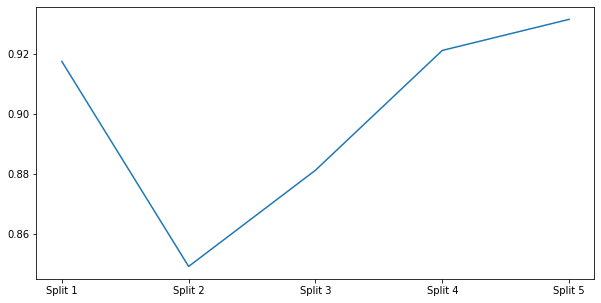

In [8]:
cv_scores(model, X_train_sc, y_train_sc, cv=5)

### Testing data

,Value
Metric,
R2 Score,0.930847
MAE,38415.125000
RMSE,55050.883954


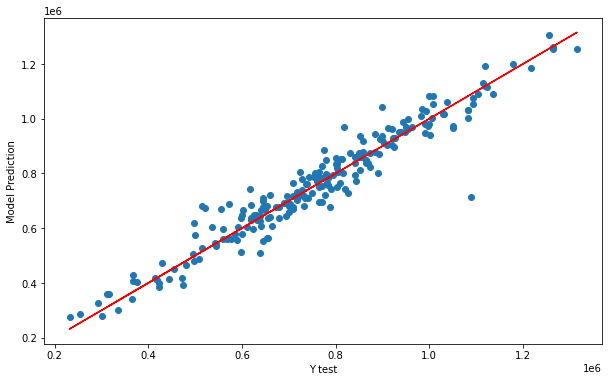

In [9]:
y_pred = model.predict(X_test_sc)
report(y_test, sc_y.inverse_transform(y_pred))

In [10]:
model.model.save('lstm.h5')